# Shallow Neural Network in Keras

Build a shallow neural network to classify MNIST digits

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/the-deep-learners/deep-learning-illustrated/blob/master/notebooks/shallow_net_in_keras.ipynb)

#### Load dependencies

In [1]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from matplotlib import pyplot as plt

Using TensorFlow backend.


#### Load data

In [2]:
(X_train, y_train), (X_valid, y_valid) = mnist.load_data()

In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
y_train[0:12]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4, 3, 5], dtype=uint8)

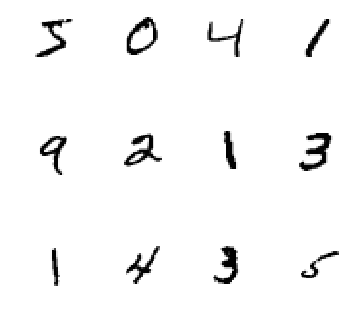

In [6]:
plt.figure(figsize=(5,5))
for k in range(12):
    plt.subplot(3, 4, k+1)
    plt.imshow(X_train[k], cmap='Greys')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
X_valid.shape

(10000, 28, 28)

In [8]:
y_valid.shape

(10000,)

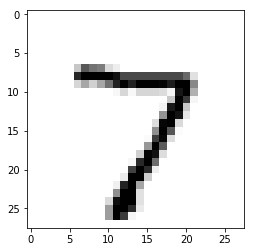

In [9]:
plt.imshow(X_valid[0], cmap='Greys')

In [10]:
X_valid[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [11]:
y_valid[0]

7

#### Preprocess data

In [12]:
X_train = X_train.reshape(60000, 784).astype('float32')
X_valid = X_valid.reshape(10000, 784).astype('float32')

In [13]:
X_train /= 255
X_valid /= 255

In [14]:
X_valid[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [15]:
n_classes = 10
y_train = keras.utils.to_categorical(y_train, n_classes)
y_valid = keras.utils.to_categorical(y_valid, n_classes)

In [16]:
y_valid[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

#### Design neural network architecture

In [17]:
model = Sequential()
model.add(Dense(64, activation='sigmoid', input_shape=(784,)))
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [19]:
(64*784)

50176

In [20]:
(64*784)+64

50240

In [21]:
(10*64)+10

650

#### Configure model

In [22]:
model.compile(loss='mean_squared_error', optimizer=SGD(lr=0.01), metrics=['accuracy'])

#### Train!

In [23]:
model.fit(X_train, y_train, batch_size=128, epochs=200, verbose=1, validation_data=(X_valid, y_valid))

Train on 60000 samples, validate on 10000 samples
Epoch 1/200
60000/60000 [==============================] - 1s 12us/step - loss: 0.0923 - acc: 0.0943 - val_loss: 0.0919 - val_acc: 0.1010
Epoch 2/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0916 - acc: 0.0979 - val_loss: 0.0912 - val_acc: 0.1075
Epoch 3/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0910 - acc: 0.1045 - val_loss: 0.0907 - val_acc: 0.1165
Epoch 4/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0905 - acc: 0.1157 - val_loss: 0.0902 - val_acc: 0.1330
Epoch 5/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0900 - acc: 0.1386 - val_loss: 0.0898 - val_acc: 0.1653
Epoch 6/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0896 - acc: 0.1754 - val_loss: 0.0894 - val_acc: 0.2143
Epoch 7/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0892 - acc: 0.2260 - val_loss: 0.0890 - 

Epoch 118/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0442 - acc: 0.7608 - val_loss: 0.0433 - val_acc: 0.7708
Epoch 119/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0439 - acc: 0.7624 - val_loss: 0.0430 - val_acc: 0.7716
Epoch 120/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0436 - acc: 0.7636 - val_loss: 0.0428 - val_acc: 0.7732
Epoch 121/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0434 - acc: 0.7651 - val_loss: 0.0425 - val_acc: 0.7743
Epoch 122/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0431 - acc: 0.7665 - val_loss: 0.0422 - val_acc: 0.7758
Epoch 123/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0428 - acc: 0.7677 - val_loss: 0.0420 - val_acc: 0.7777
Epoch 124/200
60000/60000 [==============================] - 1s 10us/step - loss: 0.0426 - acc: 0.7685 - val_loss: 0.0417 - val_acc: 0.7791
Epoch 125/200
60000/

In [24]:
model.evaluate(X_valid, y_valid)

10000/10000 [==============================] - 0s 11us/step


[0.02861827013194561, 0.856]